# Western States - Relative Pacing

In [1]:
import os.path
import datetime
import pandas as pd
import numpy as np
import hashlib
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Relative pacing is a key attribute of analysing race data. It puts all runners on a level pedestal by dividing the stage kilometre pace by the average 1-kilometre pace. This makes it easier to compare stages. For example if a runner runs a stage relatively in 0.5, they are twice as fast as the average pace. This gives an insight to the most difficult stages. 

I read in the dataset with the 1km splits of the Western States

In [2]:
df = pd.read_csv('../../data/WS_1km_splits_full.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,Unnamed: 0,Year,bib,name_mask,gender,category,runner_age,rank,nationality,Start to Lyon Ridge,...,Auburn Lake Trails to Browns Bar,Auburn Lake Trails to Quarry Road,Browns Bar to Highway 49,Quarry Road to Pointed Rocks,Highway 49 to No Hands Bridge,Pointed Rocks to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish,time,AVG_Pace
0,0,2018,20,7479fb90beffad048c5f772ba1915b4e,Male,Senior Men (23-39),28.0,NaN,USA,6.265060,...,NaN,5.280899,NaN,6.729885,NaN,NaN,11.083333,4.928571,870.066667,6.448759
1,1,2018,13,343c649718c8ed904090cbcb05ca97b1,Male,Senior Men (23-39),32.0,NaN,FRA,6.204819,...,NaN,5.842697,NaN,7.931034,NaN,NaN,14.838235,6.873016,954.883333,7.314765
2,2,2018,M3,275e1385c00219e79ea54c8d6381fc07,Male,Senior Men (23-39),33.0,3.0,USA,6.325301,...,NaN,5.842697,NaN,7.586207,NaN,NaN,14.632353,6.777778,968.983333,7.689034
3,3,2018,M7,9a22e0603cd00f47e015963c32d6f964,Male,Senior Men (23-39),37.0,4.0,USA,6.385542,...,NaN,6.067416,NaN,7.758621,NaN,NaN,13.906863,6.309524,983.533333,7.774000
4,4,2018,M10,0d274b89ac57a27941405195d37bf2c3,Male,Senior Men (23-39),31.0,6.0,USA,6.566265,...,NaN,5.617978,NaN,7.931034,NaN,NaN,12.455882,4.301587,1014.383333,7.629802


In [4]:
df_non_stage = df[[ 'Unnamed: 0'  ,  'Year', 
'bib'              ,
'name_mask'           ,
'gender',
'category'        , 
'runner_age',
'rank'             ,
'nationality', 
    'time', 
 ]]

In [5]:
#df = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Year', 'bib', 'rank', 'timediff', 'time'], axis = 1)

Dividing each stage by the average pace of that runner...

In [6]:
df1 = df.loc[:, 'Start to Lyon Ridge':'Robie Point to Finish'].div(df['AVG_Pace'], axis=0)

Again, any value below 1 is faster than the average pace, and above 1 is slower that the average pace...

In [7]:
pd.set_option('display.max_columns', None)
df1

,Start to Lyon Ridge,Start to Talbot Creek,Lyon Ridge to Red Star Ridge,Talbot Creek to Poppy Trailhead,Red Star Ridge to Duncan Canyon,Poppy Trailhead to Duncan Canyon,Duncan Canyon to Mosquito Ridge,Duncan Canyon to Robinson Flat,Mosquito Ridge to Millers Defeat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Foresthill to Dardanelles,Foresthill to Peachstone,Dardanelles to Peachstone,Peachstone to Fords Bar,Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Browns Bar,Auburn Lake Trails to Quarry Road,Browns Bar to Highway 49,Quarry Road to Pointed Rocks,Highway 49 to No Hands Bridge,Pointed Rocks to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish
0,0.971514,NaN,0.836325,NaN,0.674211,NaN,NaN,0.914088,NaN,0.704857,0.692270,0.729735,1.055328,0.813165,1.068250,0.813726,0.723653,NaN,0.736576,0.963940,NaN,3.047900,0.909023,NaN,0.818902,NaN,1.043594,NaN,NaN,1.718677,0.764267
1,0.848259,NaN,0.798754,NaN,0.653829,NaN,NaN,0.834649,NaN,0.642122,0.659136,0.643340,0.949373,0.666877,1.154438,0.839209,0.797474,NaN,0.751904,0.886766,NaN,3.158467,0.864257,NaN,0.798754,NaN,1.084250,NaN,NaN,2.028532,0.939609
2,0.822639,NaN,0.789100,NaN,0.640852,NaN,NaN,0.862472,NaN,0.709393,NaN,1.040443,0.957352,0.650277,1.127146,0.746853,0.693629,NaN,0.747818,0.913902,NaN,2.959880,0.807240,NaN,0.759874,NaN,0.986627,NaN,NaN,1.903016,0.881486
3,0.821397,NaN,0.794929,NaN,0.633848,NaN,NaN,0.866586,NaN,0.643170,NaN,1.029071,0.982620,0.658857,1.171998,0.815106,0.686047,NaN,0.739645,0.903914,NaN,3.060600,0.813203,NaN,0.780475,NaN,0.998022,NaN,NaN,1.788894,0.811619
4,0.860608,NaN,0.824679,NaN,0.655325,NaN,NaN,0.910557,NaN,0.655325,0.678729,0.678454,1.146819,0.655325,1.398027,0.889988,0.729959,NaN,0.819156,1.027266,NaN,3.254028,0.843637,NaN,0.736320,NaN,1.039481,NaN,NaN,1.632530,0.563788
5,0.783051,NaN,0.689691,NaN,0.593068,NaN,NaN,0.798163,NaN,0.620026,NaN,0.991183,0.969550,0.748567,1.257071,0.881830,NaN,NaN,1.263758,0.910817,NaN,2.863688,0.733215,NaN,0.743785,NaN,0.933811,NaN,NaN,1.676161,0.542566
6,0.841080,NaN,0.784378,NaN,0.637018,NaN,NaN,0.857311,NaN,0.685560,0.646386,0.638781,1.041399,0.693682,1.206586,0.947179,0.689478,NaN,0.791822,0.873494,NaN,3.209639,0.832129,NaN,0.827955,NaN,1.092169,NaN,NaN,1.925215,0.778741
7,0.752144,NaN,0.695118,NaN,0.578716,NaN,NaN,0.781459,NaN,0.664671,0.622672,0.569030,0.890489,0.644718,1.099832,0.690488,NaN,NaN,1.209190,NaN,NaN,3.995078,0.698169,NaN,0.695118,NaN,0.969679,NaN,NaN,1.776566,0.666862
8,0.723881,NaN,0.694007,NaN,0.553377,NaN,NaN,0.803853,NaN,0.612562,0.561515,0.620970,0.982651,0.671079,1.123030,0.789457,NaN,NaN,1.137068,NaN,NaN,3.872518,0.709962,NaN,0.744481,NaN,0.948767,NaN,NaN,1.713722,0.737100
9,0.721886,NaN,0.692095,NaN,0.568083,NaN,NaN,0.825216,NaN,0.780561,0.619964,0.645610,0.933280,0.682888,1.095048,0.731839,NaN,NaN,1.105937,NaN,NaN,3.823229,0.785242,NaN,0.679512,NaN,0.926843,NaN,NaN,1.678806,0.703960


In [8]:
des = df1.describe()

In [9]:
pd.set_option('display.max_columns', None)
des

,Start to Lyon Ridge,Start to Talbot Creek,Lyon Ridge to Red Star Ridge,Talbot Creek to Poppy Trailhead,Red Star Ridge to Duncan Canyon,Poppy Trailhead to Duncan Canyon,Duncan Canyon to Mosquito Ridge,Duncan Canyon to Robinson Flat,Mosquito Ridge to Millers Defeat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Foresthill to Dardanelles,Foresthill to Peachstone,Dardanelles to Peachstone,Peachstone to Fords Bar,Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Browns Bar,Auburn Lake Trails to Quarry Road,Browns Bar to Highway 49,Quarry Road to Pointed Rocks,Highway 49 to No Hands Bridge,Pointed Rocks to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish
count,2454.000000,418.000000,2526.000000,391.000000,2475.000000,411.000000,362.000000,2545.000000,351.000000,2424.000000,2731.000000,2711.000000,2787.000000,2397.000000,2717.000000,2612.000000,19.000000,2188.000000,314.000000,21.000000,2095.000000,2388.000000,2367.000000,1766.000000,548.000000,1773.000000,546.000000,606.000000,1.000000,2223.000000,2284.000000
mean,0.775544,0.660227,0.837430,0.576282,0.654268,0.771869,0.845278,0.928438,0.934598,0.901133,0.719941,0.672249,1.135329,0.831843,1.431962,0.900180,0.726815,0.899502,1.192696,0.934324,0.979359,1.784798,0.964769,0.941746,0.842431,1.132890,0.989376,0.762379,0.477885,1.977012,0.928307
std,0.126209,0.083999,0.287149,0.152695,0.134021,0.194687,0.162011,0.197645,0.205643,0.229802,0.244039,0.151627,0.231366,0.200096,0.480820,0.184302,0.057317,0.175467,0.227780,0.090788,0.219693,1.067633,0.233618,0.205759,0.199675,0.266393,0.237567,0.150221,NaN,0.736336,0.508965
min,0.244503,0.431898,0.157005,0.264323,0.195443,0.266470,0.372883,0.310788,0.197469,0.221203,0.229123,0.231049,0.296602,0.281078,0.256580,0.310596,0.647396,0.471243,0.517164,0.788116,0.496158,0.260381,0.285944,0.536676,0.238371,0.459937,0.286340,0.389680,0.477885,0.526867,0.427640
25%,0.687365,0.613242,0.695976,0.519177,0.571548,0.681327,0.763597,0.817308,0.852300,0.754027,0.595858,0.585902,1.014857,0.726676,1.168809,0.800354,0.691553,0.801417,1.099905,0.902506,0.860414,1.194759,0.850606,0.833672,0.717537,0.998658,0.852370,0.670853,0.477885,1.385063,0.728141
50%,0.773421,0.663914,0.790326,0.562792,0.643521,0.735985,0.817979,0.905099,0.914258,0.877047,0.689443,0.650190,1.116216,0.808677,1.290762,0.883691,0.717538,0.876461,1.208791,0.913902,0.933282,1.342439,0.944093,0.914643,0.813898,1.103461,0.966849,0.743731,0.477885,2.060259,0.831745
75%,0.860088,0.709576,0.876585,0.604616,0.717705,0.790878,0.890646,0.990318,0.973653,1.026984,0.775136,0.727174,1.213017,0.891299,1.439873,0.965621,0.749358,0.961495,1.298459,0.963940,1.033555,1.650114,1.041428,1.016050,0.939966,1.216938,1.090283,0.830711,0.477885,2.412580,0.955252
max,1.288465,0.991797,2.570693,1.968199,1.720336,1.552118,1.704338,2.107881,2.171552,2.613082,3.286951,2.114917,2.736356,2.331912,5.129510,2.829556,0.889799,3.034490,2.919838,1.228692,2.843248,7.796214,4.216891,4.142170,2.155870,7.435626,4.043042,1.866692,0.477885,10.974807,4.986156


I wanted to find out what the most significant stage was in the race in terms of time. I made new columns called max_stage and max_val which contained the name of the stage with the longest time, and the time respectively. 

In [10]:
des['max_stage'] = des.idxmax(axis = 1)
des['max_val'] = des.max(axis = 1)
des

,Start to Lyon Ridge,Start to Talbot Creek,Lyon Ridge to Red Star Ridge,Talbot Creek to Poppy Trailhead,Red Star Ridge to Duncan Canyon,Poppy Trailhead to Duncan Canyon,Duncan Canyon to Mosquito Ridge,Duncan Canyon to Robinson Flat,Mosquito Ridge to Millers Defeat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Foresthill to Dardanelles,Foresthill to Peachstone,Dardanelles to Peachstone,Peachstone to Fords Bar,Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Browns Bar,Auburn Lake Trails to Quarry Road,Browns Bar to Highway 49,Quarry Road to Pointed Rocks,Highway 49 to No Hands Bridge,Pointed Rocks to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish,max_stage,max_val
count,2454.000000,418.000000,2526.000000,391.000000,2475.000000,411.000000,362.000000,2545.000000,351.000000,2424.000000,2731.000000,2711.000000,2787.000000,2397.000000,2717.000000,2612.000000,19.000000,2188.000000,314.000000,21.000000,2095.000000,2388.000000,2367.000000,1766.000000,548.000000,1773.000000,546.000000,606.000000,1.000000,2223.000000,2284.000000,Last Chance to Devils Thumb,2787.000000
mean,0.775544,0.660227,0.837430,0.576282,0.654268,0.771869,0.845278,0.928438,0.934598,0.901133,0.719941,0.672249,1.135329,0.831843,1.431962,0.900180,0.726815,0.899502,1.192696,0.934324,0.979359,1.784798,0.964769,0.941746,0.842431,1.132890,0.989376,0.762379,0.477885,1.977012,0.928307,No Hands Bridge to Robie Point,1.977012
std,0.126209,0.083999,0.287149,0.152695,0.134021,0.194687,0.162011,0.197645,0.205643,0.229802,0.244039,0.151627,0.231366,0.200096,0.480820,0.184302,0.057317,0.175467,0.227780,0.090788,0.219693,1.067633,0.233618,0.205759,0.199675,0.266393,0.237567,0.150221,NaN,0.736336,0.508965,Rucky Chucky to Green Gate,1.067633
min,0.244503,0.431898,0.157005,0.264323,0.195443,0.266470,0.372883,0.310788,0.197469,0.221203,0.229123,0.231049,0.296602,0.281078,0.256580,0.310596,0.647396,0.471243,0.517164,0.788116,0.496158,0.260381,0.285944,0.536676,0.238371,0.459937,0.286340,0.389680,0.477885,0.526867,0.427640,Peachstone to Fords Bar,0.788116
25%,0.687365,0.613242,0.695976,0.519177,0.571548,0.681327,0.763597,0.817308,0.852300,0.754027,0.595858,0.585902,1.014857,0.726676,1.168809,0.800354,0.691553,0.801417,1.099905,0.902506,0.860414,1.194759,0.850606,0.833672,0.717537,0.998658,0.852370,0.670853,0.477885,1.385063,0.728141,No Hands Bridge to Robie Point,1.385063
50%,0.773421,0.663914,0.790326,0.562792,0.643521,0.735985,0.817979,0.905099,0.914258,0.877047,0.689443,0.650190,1.116216,0.808677,1.290762,0.883691,0.717538,0.876461,1.208791,0.913902,0.933282,1.342439,0.944093,0.914643,0.813898,1.103461,0.966849,0.743731,0.477885,2.060259,0.831745,No Hands Bridge to Robie Point,2.060259
75%,0.860088,0.709576,0.876585,0.604616,0.717705,0.790878,0.890646,0.990318,0.973653,1.026984,0.775136,0.727174,1.213017,0.891299,1.439873,0.965621,0.749358,0.961495,1.298459,0.963940,1.033555,1.650114,1.041428,1.016050,0.939966,1.216938,1.090283,0.830711,0.477885,2.412580,0.955252,No Hands Bridge to Robie Point,2.412580
max,1.288465,0.991797,2.570693,1.968199,1.720336,1.552118,1.704338,2.107881,2.171552,2.613082,3.286951,2.114917,2.736356,2.331912,5.129510,2.829556,0.889799,3.034490,2.919838,1.228692,2.843248,7.796214,4.216891,4.142170,2.155870,7.435626,4.043042,1.866692,0.477885,10.974807,4.986156,No Hands Bridge to Robie Point,10.974807


In [11]:
des = des[['max_stage', 'max_val']]
des

,max_stage,max_val
count,Last Chance to Devils Thumb,2787.000000
mean,No Hands Bridge to Robie Point,1.977012
std,Rucky Chucky to Green Gate,1.067633
min,Peachstone to Fords Bar,0.788116
25%,No Hands Bridge to Robie Point,1.385063
50%,No Hands Bridge to Robie Point,2.060259
75%,No Hands Bridge to Robie Point,2.412580
max,No Hands Bridge to Robie Point,10.974807


The max relative pace on average for the Western States endurance run was No Hands Bridge to
Robie Point. It was immediately investigated whether this was a refuge station, like Courmayeur.
However, this was not the case. The reason this stage has the max relative pace is more than
likely due to it being the penultimate stage. As well as this, it is uphill, with a rise of over 200
metres

# Correlation

In [12]:
corr = df1.corr()
corr

,Start to Lyon Ridge,Start to Talbot Creek,Lyon Ridge to Red Star Ridge,Talbot Creek to Poppy Trailhead,Red Star Ridge to Duncan Canyon,Poppy Trailhead to Duncan Canyon,Duncan Canyon to Mosquito Ridge,Duncan Canyon to Robinson Flat,Mosquito Ridge to Millers Defeat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Foresthill to Dardanelles,Foresthill to Peachstone,Dardanelles to Peachstone,Peachstone to Fords Bar,Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Browns Bar,Auburn Lake Trails to Quarry Road,Browns Bar to Highway 49,Quarry Road to Pointed Rocks,Highway 49 to No Hands Bridge,Pointed Rocks to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish
Start to Lyon Ridge,1.000000,NaN,0.799897,NaN,0.669593,NaN,0.374069,0.462448,0.085504,0.348427,0.227919,0.381841,0.304033,0.287115,-0.090748,0.310447,-0.384244,0.200368,0.186941,0.507121,0.053560,-0.447451,0.284960,0.094131,0.397607,0.078767,0.433293,-0.058600,NaN,-0.388959,-0.153924
Start to Talbot Creek,NaN,1.000000,NaN,0.814539,NaN,0.250951,NaN,0.672543,NaN,0.312190,0.124928,0.438494,0.243150,0.204958,0.096391,0.288049,NaN,0.200898,NaN,NaN,0.008768,-0.461034,-0.080165,-0.158832,NaN,0.051158,NaN,-0.078735,NaN,-0.274030,-0.162746
Lyon Ridge to Red Star Ridge,0.799897,NaN,1.000000,NaN,0.209446,NaN,0.088393,0.086080,-0.006068,0.169682,0.041121,0.079031,0.048407,0.085356,-0.033804,0.057392,-0.447014,-0.043477,0.122035,0.588715,-0.085607,-0.272754,0.037893,-0.090001,0.331120,-0.109034,0.388055,-0.127370,NaN,-0.171516,-0.067792
Talbot Creek to Poppy Trailhead,NaN,0.814539,NaN,1.000000,NaN,0.304656,NaN,0.210462,NaN,0.063215,0.031197,0.136369,0.063980,0.157853,-0.014542,0.063371,NaN,0.171200,NaN,NaN,0.073767,-0.194679,-0.071712,-0.120427,NaN,-0.063352,NaN,-0.207151,NaN,-0.225348,-0.134445
Red Star Ridge to Duncan Canyon,0.669593,NaN,0.209446,NaN,1.000000,NaN,0.306840,0.593220,0.059008,0.389343,0.243577,0.328624,0.249103,0.230334,-0.114720,0.239436,-0.396261,0.134874,0.290715,0.592100,0.048868,-0.352817,0.213278,0.050836,0.369395,0.028715,0.415378,-0.119936,NaN,-0.330144,-0.105497
Poppy Trailhead to Duncan Canyon,NaN,0.250951,NaN,0.304656,NaN,1.000000,NaN,0.174461,NaN,0.102611,0.033927,0.076075,0.076736,0.068651,-0.038097,0.036991,NaN,0.119339,NaN,NaN,-0.076622,-0.300430,-0.057648,-0.171846,NaN,0.030069,NaN,-0.907798,NaN,-0.154677,-0.135400
Duncan Canyon to Mosquito Ridge,0.374069,NaN,0.088393,NaN,0.306840,NaN,1.000000,NaN,0.031313,NaN,0.187222,0.058974,0.174781,0.136215,0.266686,0.064566,NaN,-0.016746,NaN,NaN,-0.112087,-0.208106,-0.096107,-0.267923,NaN,-0.216943,NaN,-0.066807,NaN,-0.124339,-0.103665
Duncan Canyon to Robinson Flat,0.462448,0.672543,0.086080,0.210462,0.593220,0.174461,NaN,1.000000,NaN,0.339650,0.194379,0.285577,0.255585,0.204145,-0.083316,0.183644,-0.447767,0.102557,0.138098,-0.128466,-0.022591,-0.285437,0.087904,-0.005608,0.148304,-0.001219,0.181049,-0.170586,NaN,-0.269886,-0.145835
Mosquito Ridge to Millers Defeat,0.085504,NaN,-0.006068,NaN,0.059008,NaN,0.031313,NaN,1.000000,NaN,-0.092828,0.075857,0.070126,0.097366,0.156299,0.197740,NaN,0.065450,NaN,NaN,-0.032296,-0.204107,-0.040818,-0.231047,NaN,-0.207174,NaN,-0.091443,NaN,-0.093880,-0.087061
Robinson Flat to Millers Defeat,0.348427,0.312190,0.169682,0.063215,0.389343,0.102611,NaN,0.339650,NaN,1.000000,0.206502,0.196863,0.252614,0.198180,-0.028140,0.170793,-0.463394,0.051876,0.096432,0.580497,-0.031254,-0.407886,0.219976,0.034684,0.115695,0.011280,0.115561,-0.110721,NaN,-0.043575,-0.114613


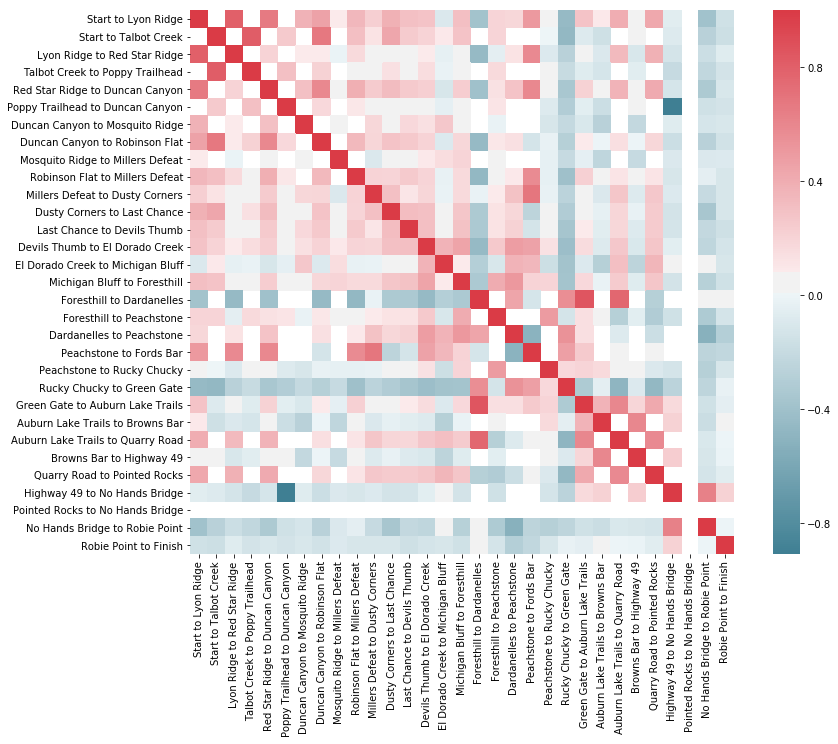

In [13]:
f, ax = plt.subplots(figsize=(14, 10))
corr = df1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

For Western States, the correlations are shown above. The correlation between the first
half stages are positively correlated with each other. It is hard to pinpoint where this changes.
Foresthill to Dardanelles is the first stage that is negatively correlated with its preceding stages.
However, the three stages after all have positive correlations with each other. Towards the end of
the race, there are also a cluster of stages that are positively correlated with one another. From
Green Gate to No Hands Bridge there is strong correlations. Interestingly, the last two stages are
negatively correlated to nearly all of the stages. They are not even positively correlated with each
other.


In [14]:
corr['max'] = corr[corr < 1].idxmax()

In [15]:
corr['max_val'] = corr[corr < 1].max()

In [16]:
max1 = corr['max']
max_val = corr['max_val']
frames = [max1, max_val]
maxy = pd.concat(frames, axis=1)

In [17]:
maxy

,max,max_val
Start to Lyon Ridge,Lyon Ridge to Red Star Ridge,0.799897
Start to Talbot Creek,Talbot Creek to Poppy Trailhead,0.814539
Lyon Ridge to Red Star Ridge,Start to Lyon Ridge,0.799897
Talbot Creek to Poppy Trailhead,Start to Talbot Creek,0.814539
Red Star Ridge to Duncan Canyon,Start to Lyon Ridge,0.669593
Poppy Trailhead to Duncan Canyon,Talbot Creek to Poppy Trailhead,0.304656
Duncan Canyon to Mosquito Ridge,Start to Lyon Ridge,0.374069
Duncan Canyon to Robinson Flat,Start to Talbot Creek,0.672543
Mosquito Ridge to Millers Defeat,Michigan Bluff to Foresthill,0.197740
Robinson Flat to Millers Defeat,Peachstone to Fords Bar,0.580497


In [18]:
maxy.sort_values(by = 'max_val').head(10)

,max,max_val
Mosquito Ridge to Millers Defeat,Michigan Bluff to Foresthill,0.197740
Robie Point to Finish,Highway 49 to No Hands Bridge,0.215716
Poppy Trailhead to Duncan Canyon,Talbot Creek to Poppy Trailhead,0.304656
Last Chance to Devils Thumb,Dusty Corners to Last Chance,0.319550
El Dorado Creek to Michigan Bluff,Devils Thumb to El Dorado Creek,0.371798
Duncan Canyon to Mosquito Ridge,Start to Lyon Ridge,0.374069
Dusty Corners to Last Chance,Start to Talbot Creek,0.438494
Devils Thumb to El Dorado Creek,Dardanelles to Peachstone,0.478416
Foresthill to Peachstone,Peachstone to Rucky Chucky,0.498054
Peachstone to Rucky Chucky,Foresthill to Peachstone,0.498054


In [19]:
maxy.sort_values(by = 'max_val', ascending=False).head(10)

,max,max_val
Foresthill to Dardanelles,Green Gate to Auburn Lake Trails,0.857162
Green Gate to Auburn Lake Trails,Foresthill to Dardanelles,0.857162
Talbot Creek to Poppy Trailhead,Start to Talbot Creek,0.814539
Start to Talbot Creek,Talbot Creek to Poppy Trailhead,0.814539
Start to Lyon Ridge,Lyon Ridge to Red Star Ridge,0.799897
Lyon Ridge to Red Star Ridge,Start to Lyon Ridge,0.799897
Auburn Lake Trails to Quarry Road,Foresthill to Dardanelles,0.766487
Peachstone to Fords Bar,Millers Defeat to Dusty Corners,0.687111
Millers Defeat to Dusty Corners,Peachstone to Fords Bar,0.687111
Duncan Canyon to Robinson Flat,Start to Talbot Creek,0.672543


In [20]:
corr = corr.filter(like='to')

In [21]:
allstage = corr.stack().reset_index()

In [22]:
allstage.insert(0, 'Value1', pd.factorize(allstage['level_0'])[0] + 1)
allstage.insert(2, 'Value2', pd.factorize(allstage['level_1'])[0] + 1)

In [23]:
allstage

,Value1,level_0,Value2,level_1,0
0,1,Start to Lyon Ridge,1,Start to Lyon Ridge,1.000000
1,1,Start to Lyon Ridge,2,Lyon Ridge to Red Star Ridge,0.799897
2,1,Start to Lyon Ridge,3,Red Star Ridge to Duncan Canyon,0.669593
3,1,Start to Lyon Ridge,4,Duncan Canyon to Mosquito Ridge,0.374069
4,1,Start to Lyon Ridge,5,Duncan Canyon to Robinson Flat,0.462448
5,1,Start to Lyon Ridge,6,Mosquito Ridge to Millers Defeat,0.085504
6,1,Start to Lyon Ridge,7,Robinson Flat to Millers Defeat,0.348427
7,1,Start to Lyon Ridge,8,Millers Defeat to Dusty Corners,0.227919
8,1,Start to Lyon Ridge,9,Dusty Corners to Last Chance,0.381841
9,1,Start to Lyon Ridge,10,Last Chance to Devils Thumb,0.304033


In [24]:
allstage.rename(columns={0: 'correlation'}, inplace=True)

In [25]:
allstage['Gap'] = allstage['Value2'] - allstage['Value1']

In [26]:
allstage['Gap'] = allstage['Gap'].abs()

In [27]:
allstage

,Value1,level_0,Value2,level_1,correlation,Gap
0,1,Start to Lyon Ridge,1,Start to Lyon Ridge,1.000000,0
1,1,Start to Lyon Ridge,2,Lyon Ridge to Red Star Ridge,0.799897,1
2,1,Start to Lyon Ridge,3,Red Star Ridge to Duncan Canyon,0.669593,2
3,1,Start to Lyon Ridge,4,Duncan Canyon to Mosquito Ridge,0.374069,3
4,1,Start to Lyon Ridge,5,Duncan Canyon to Robinson Flat,0.462448,4
5,1,Start to Lyon Ridge,6,Mosquito Ridge to Millers Defeat,0.085504,5
6,1,Start to Lyon Ridge,7,Robinson Flat to Millers Defeat,0.348427,6
7,1,Start to Lyon Ridge,8,Millers Defeat to Dusty Corners,0.227919,7
8,1,Start to Lyon Ridge,9,Dusty Corners to Last Chance,0.381841,8
9,1,Start to Lyon Ridge,10,Last Chance to Devils Thumb,0.304033,9


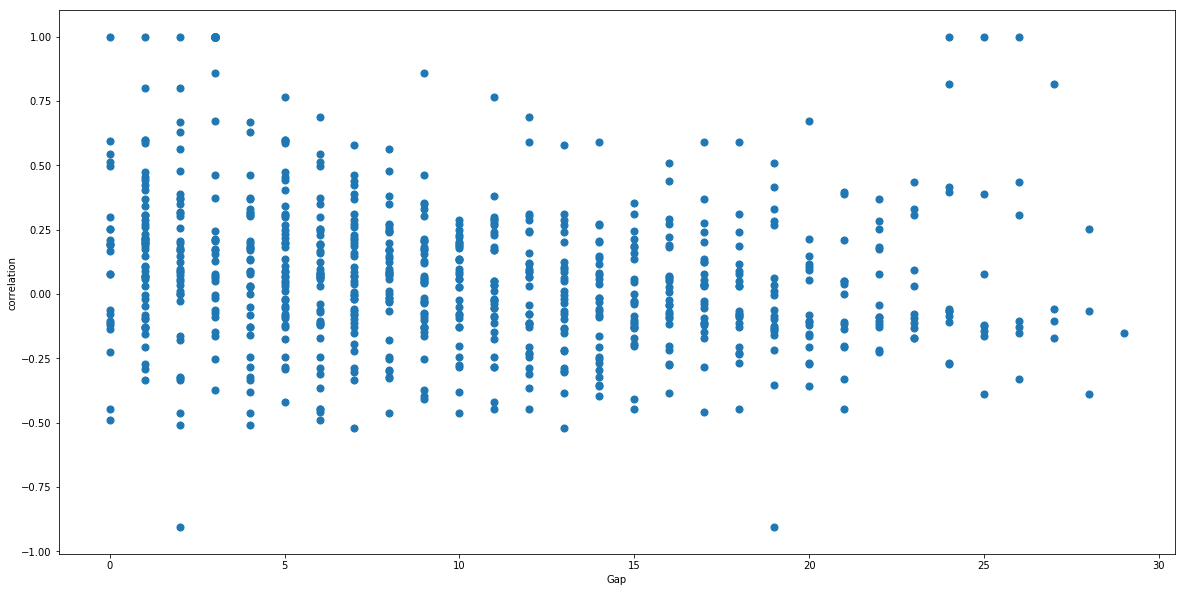

In [28]:
allstage.plot.scatter(x='Gap', y='correlation', figsize=(20, 10), s=50)